# **LOADING AND CONCATENATING DATA**





In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=7)
import seaborn as sns
import csv

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from scipy.stats.mstats import winsorize
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Fetching train and test datasets

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_preproc = pd.concat((data_train.loc[:,'Id':'SaleCondition'],
                      data_test.loc[:,'Id':'SaleCondition']))
data_preproc = data_preproc.set_index('Id')

In [4]:
data_preproc.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [5]:
len(data_preproc.columns)

79

# **Exploratory Data Analysis and Visualizations**


In [6]:
num = data_preproc.select_dtypes("number").columns.to_list()
categorical_text = data_preproc.select_dtypes("object").columns.to_list()
continuous = [col for col in num if data_preproc[col].nunique() > 20]
discrete = [col for col in num if data_preproc[col].nunique() <= 20]

print(f"Columns with continuous values: {continuous}")
print(f"Number of Columns with continuous values: {len(continuous)}", end="\n\n")

print(f"Columns with object (categorical) values: {categorical_text}")
print(f"Number of Columns with object (categorical) values: {len(categorical_text)}", end="\n\n")

print(f"Columns with discrete numerical values: {discrete}")
print(f"Number of Columns with discrete numerical values: {len(discrete)}")

Columns with continuous values: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']
Number of Columns with continuous values: 21

Columns with object (categorical) values: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Number 

MSSubClass 0.25712319374728615
OverallQual 0.7099731345435667
OverallCond 0.3280823855813067
BsmtFullBath 0.1140425143656628
BsmtHalfBath 0.061369082217300835
FullBath 0.4372841733826058
HalfBath 0.1626100096796165
BedroomAbvGr 0.1502690214256394
KitchenAbvGr 0.2305176315702415
TotRmsAbvGrd 0.42997355833847506
Fireplaces 0.23505136316029182
GarageCars 0.43500014012422905
PoolArea 0.708301788638945
MoSold 0.03996602659615801
YrSold 0.020680866425301935


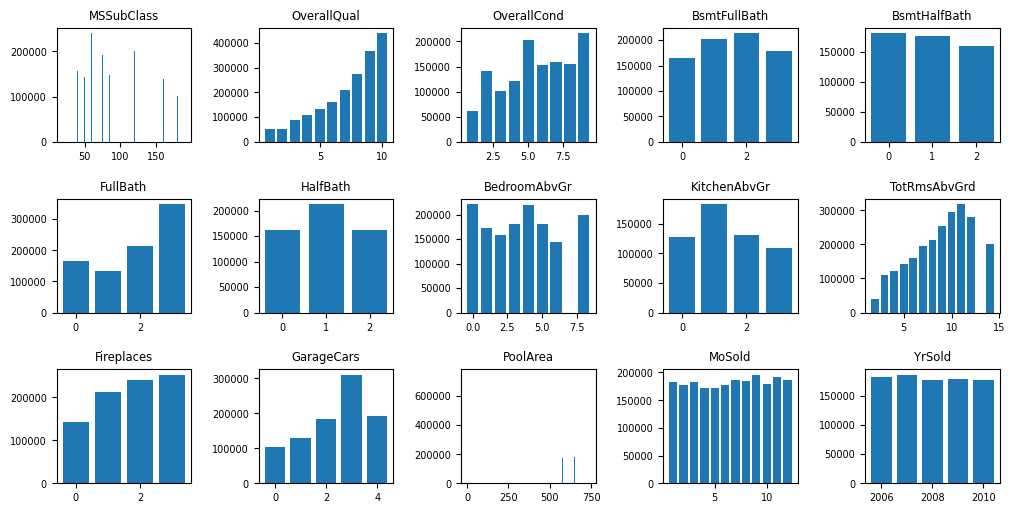

In [7]:
figure, axis = plt.subplots(3, 5,figsize=(10,5))
figure.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

i_1 = 0
j_1 = 0

for i in discrete:
  x_plot = sorted(list(data_train[i].unique()))
  y_plot = data_train.groupby(i).mean()['SalePrice']
  axis[i_1, j_1].bar(x_plot, y_plot)
  axis[i_1, j_1].set_title(i)
  j_1 +=1
  i_1 += j_1//5
  j_1%=5
  print(i, y_plot.std()/y_plot.mean())

plt.show()

From the visual analysis of the discrete numerical features, we can conclude that there exist certain features which have very less impact on the prices, for instalce the Year Sold, Month Sold, Bsmt  Half Bath etc and these have very low **Coefficient of Variation**, that is very low ratio of Standard Deviation and Mean. These can be simply eliminated on the basis of a threshold of **Coefficient of Variation**. On the other hand, there are certain features which have a huge number of data points with a given value. For instance, the value of Pool Area for most of the datapoints is 0, hence it does not provide us with any valuable insight.

MSZoning 0.37667075230948693
Street 0.23140130098079084
Alley 0.2230890374455808
LotShape 0.15158681786119257
LandContour 0.19748067696152435
Utilities 0.1929619965542977
LotConfig 0.10956819065130309
LandSlope 0.06449759253267065
Neighborhood 0.36270622227890653
Condition1 0.19230926545481536
Condition2 0.4677077130550386
BldgType 0.1843210575022014
HouseStyle 0.22493349237473492
RoofStyle 0.15262387457193877
RoofMatl 0.3720889691280106
Exterior1st 0.34676448509188534
Exterior2nd 0.31691548480100123
MasVnrType 0.28249666934815365
ExterQual 0.5854267567882425
ExterCond 0.3694394232613647
Foundation 0.25728188960568305
BsmtQual 0.4801351960745149
BsmtCond 0.45671175879156717
BsmtExposure 0.1877508715671766
BsmtFinType1 0.19821302013461453
BsmtFinType2 0.11728970369704167
Heating 0.395504101244067
HeatingQC 0.32425977155743996
CentralAir 0.3926628304850107
Electrical 0.3817811926951271
KitchenQual 0.5014999776192501
Functional 0.2164350830656681
FireplaceQu 0.36903489130768685
GarageType

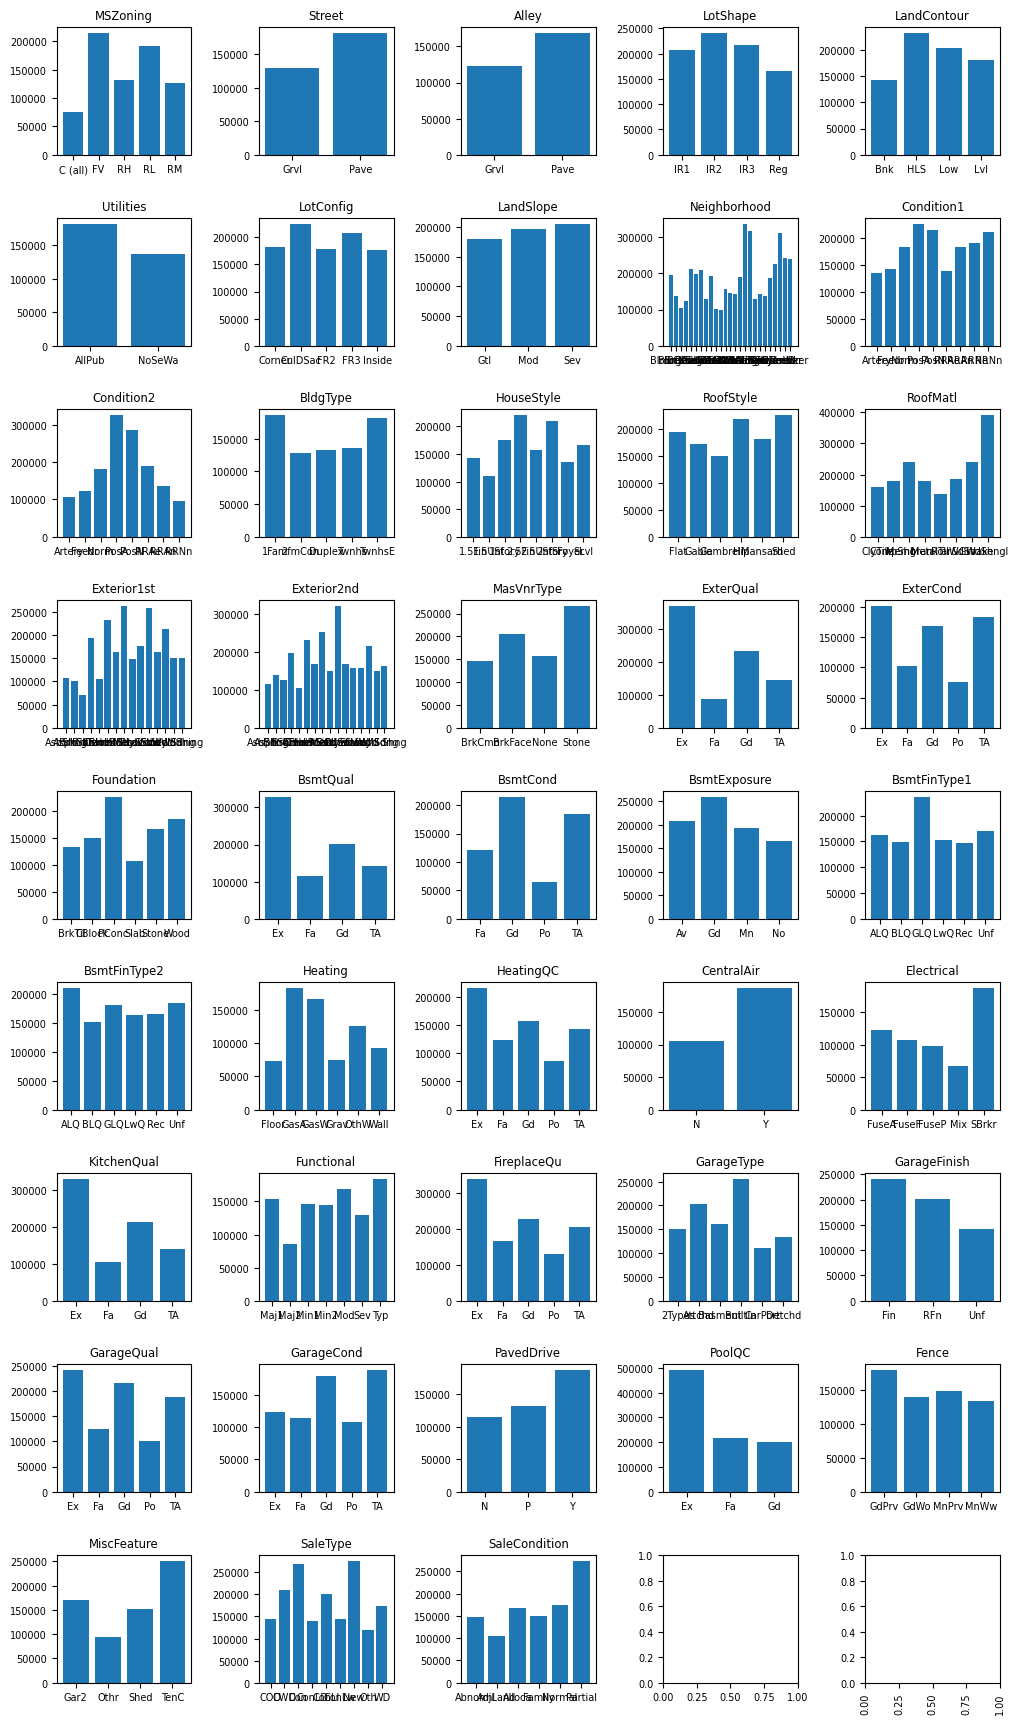

In [8]:
figure, axis = plt.subplots(9, 5,figsize=(10,17))
figure.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

i_1 = 0
j_1 = 0

for i in categorical_text:
  x1 = list(data_train[i].unique())
  for i2 in x1:
    if i2!=i2:
      x1.remove(i2)
  x_plot = sorted(x1)
  y_plot = data_train.groupby(i).mean()['SalePrice']
  axis[i_1, j_1].bar(x_plot, y_plot)
  axis[i_1, j_1].set_title(i)

  print(i, y_plot.std()/y_plot.mean())

  j_1 +=1
  i_1 += j_1//5
  j_1%=5

plt.xticks(rotation=90)
plt.show()

From the visual analysis of the categorical text features, we can conclude that once again, **Coefficient of Variation** can be a great metric to eliminate the features which are not important.

LotFrontage 0.38501516873370106
LotArea 0.43751572537739497
YearBuilt 0.3315766067442402
YearRemodAdd 0.25531115122838
MasVnrArea 0.40479279134581597
BsmtFinSF1 0.44801058984344705
BsmtFinSF2 0.3173628574400128
BsmtUnfSF 0.3982135808572348
TotalBsmtSF 0.42673939389339877
1stFlrSF 0.4340534432057336
2ndFlrSF 0.44212805106532665
LowQualFinSF 0.5133946112555253
GrLivArea 0.45152071941052413
GarageYrBlt 0.27856037626653574
GarageArea 0.4247252470943034
WoodDeckSF 0.40898163485853267
OpenPorchSF 0.34597423864098176
EnclosedPorch 0.4043597074754631
3SsnPorch 0.3428160912413857
ScreenPorch 0.3734888461056599
MiscVal 0.3764529886205659


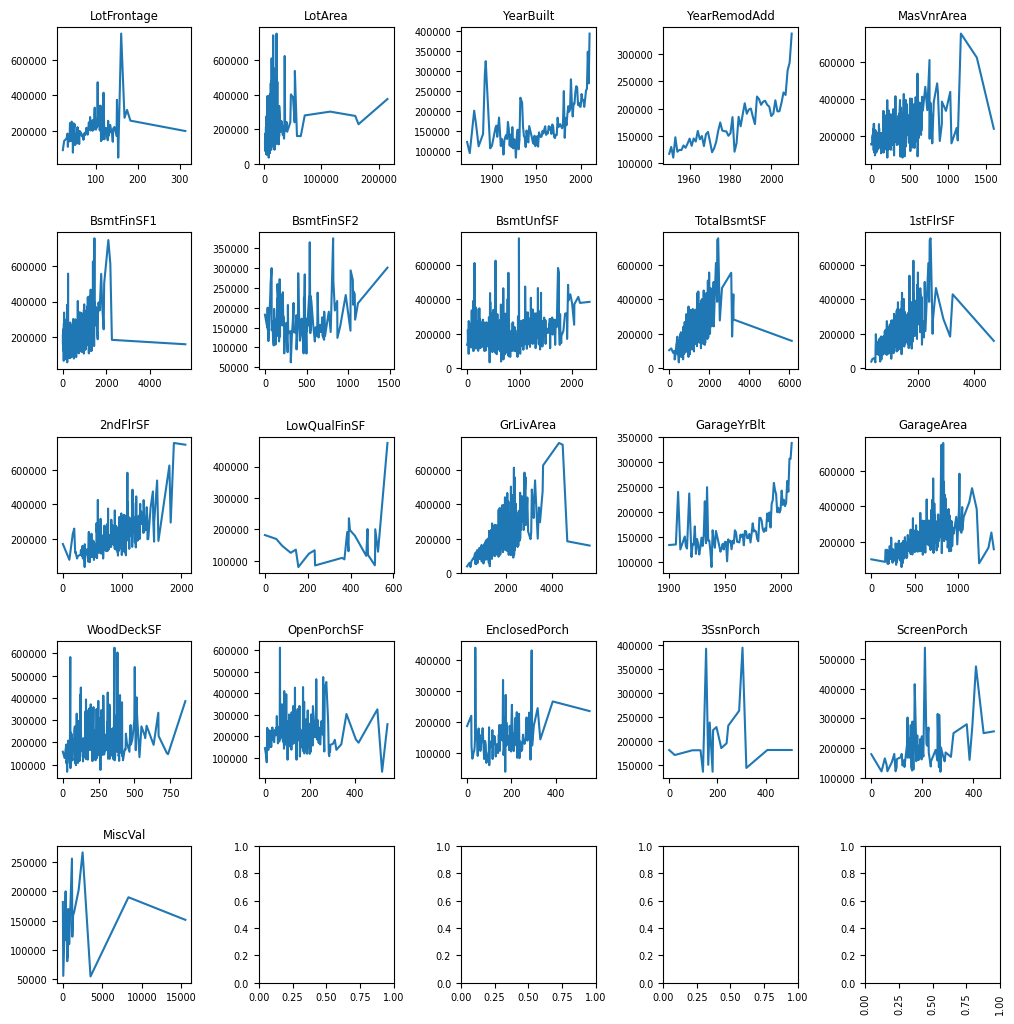

In [9]:
figure, axis = plt.subplots(5, 5,figsize=(10,10))
figure.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

i_1 = 0
j_1 = 0

for i in continuous:
  x1 = list(data_train[i].unique())
  for i2 in x1:
    if i2!=i2:
      x1.remove(i2)
  x_plot = sorted(x1)
  y_plot = data_train.groupby(i).mean()['SalePrice']
  axis[i_1, j_1].plot(x_plot, y_plot)
  axis[i_1, j_1].set_title(i)

  print(i, y_plot.std()/y_plot.mean())

  j_1 +=1
  i_1 += j_1//5
  j_1%=5

plt.xticks(rotation=90)
plt.show()

The Graphs for features with continous values provide us two insights:

> 1) ***Existence of Outliers***: There are certain features which show a trend in input value vs output, but become inconsistent at certain points. Hence, for such features, elimination of these outliers will lead to a better non-overfitted model

> 2) ***No Trend Despite High Coefficient of Variation***: In such cases, Coefficient of Variation might not be able to successfully eliminate all the non-important features, but we'd also require other tools to post application of Coefficient of Variation Threshold in order to filter obtain the useful features

In [10]:
data_train["SalePrice"].quantile([0,0.25,0.50,0.75,0.99])

0.00     34900.00
0.25    129975.00
0.50    163000.00
0.75    214000.00
0.99    442567.01
Name: SalePrice, dtype: float64

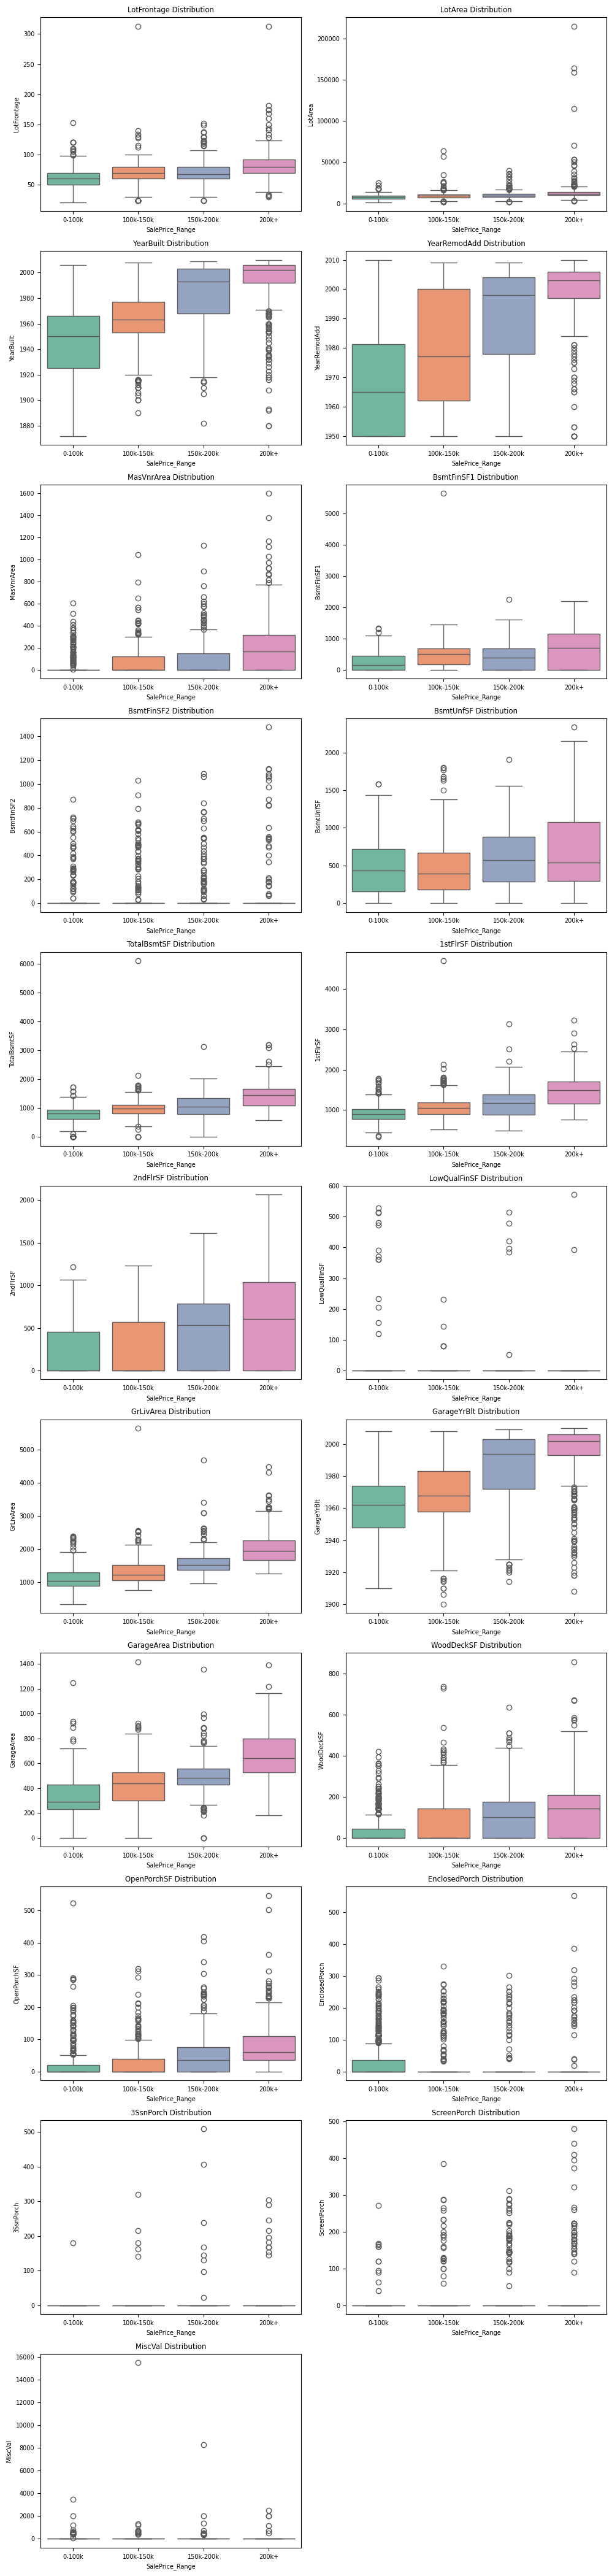

In [11]:
#Reference: https://www.kaggle.com/code/delikansapmaz/house-prices-prediction#-%F0%9F%93%88-EDA-%F0%9F%93%88

plt.figure(figsize=(10, len(continuous)*2))
data_train["SalePrice_Range"] = pd.cut(data_train["SalePrice"],
                                 bins=np.array([-np.inf, 130, 160, 210, np.inf])*1000,
                                 labels=["0-100k","100k-150k","150k-200k","200k+"])

for idx, column in enumerate(continuous):
    plt.subplot(len(continuous) // 2 + 1, 2, idx + 1)
    sns.boxplot(x="SalePrice_Range", y=column, data=data_train, palette="Set2")  # Change palette here
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

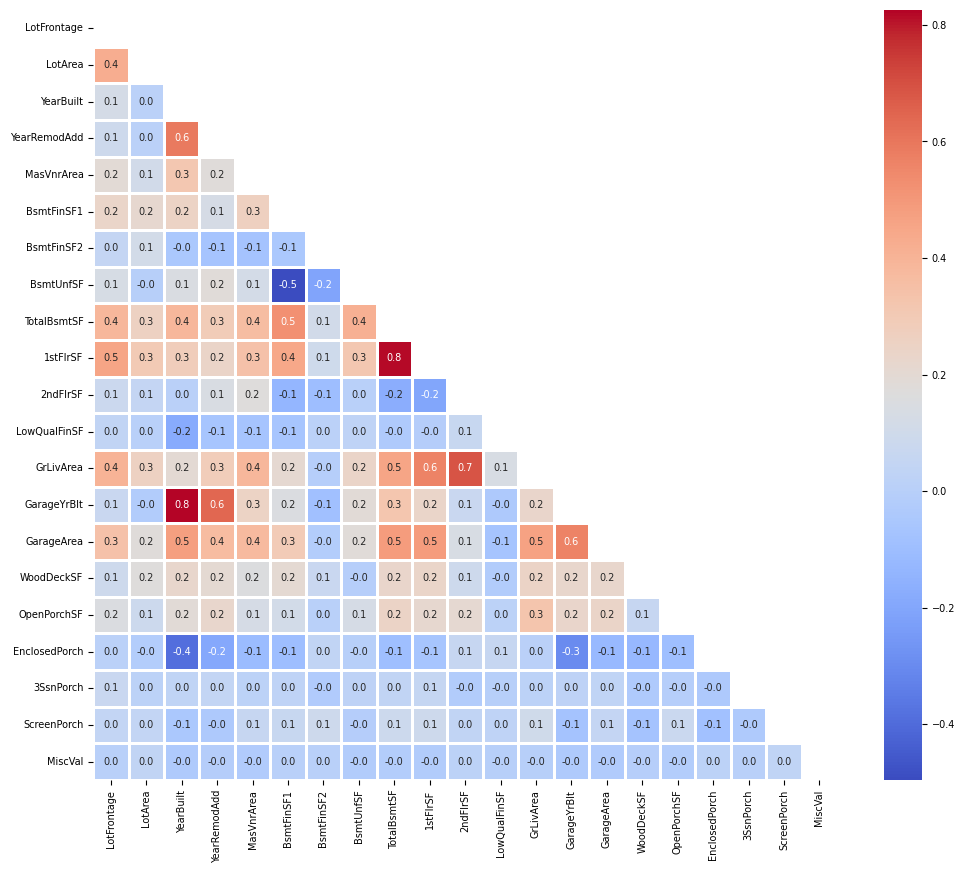

In [12]:
#Reference: https://www.kaggle.com/code/delikansapmaz/house-prices-prediction#-%F0%9F%93%88-EDA-%F0%9F%93%88

plt.figure(figsize=(12, 10))
corr = data_train[continuous].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt=".1f", linewidths=1, mask=mask, cmap="coolwarm")  # Change cmap here
plt.show()

The Box Plot Visualizations and the Correlation Matrix verify our finding that there exist a huge number of outliers in the features with continuous values. Moreover, the following insights have also been inferred:

> 1) The boxes of the box plot of most of the features are not symetrically positioned and whiskers are of unequal lengths. Hence there is a **High Level of Skewness** in the dataset and normalization must be conducted to get better results

> 2) We don't have a huge amount of highly correlated features.

# **Data Preprocessing and Feature Engineering**

In [13]:
#Removing columns with a large amount of missing data

for i in data_preproc.columns:
  tot = 0
  for j in data_preproc[i].value_counts():
    tot+=j
  if tot<2000:
    del data_preproc[i]
len(data_preproc.columns)

74

In [14]:
#Separating Integer and String data

df_noStr = pd.DataFrame()
df_only_str = pd.DataFrame()
for i in data_preproc.columns:
  if data_preproc[i].dtypes!=object:
    df_noStr[i] = data_preproc[i]
  else:
    df_only_str[i] = data_preproc[i]

In [15]:
#KNN Imputation in numerical data

imputer = KNNImputer(n_neighbors=20)
imputed = imputer.fit_transform(df_noStr)
df_imputed = pd.DataFrame(imputed, columns = df_noStr.columns)
df_imputed_final = df_imputed.copy()
for i in data_preproc.columns:
  if data_preproc[i].dtypes==object:
    df_imputed_final[i] = data_preproc[i]

In [16]:
#Mode based Imputation in object typed data

categorical_columns_with_missing_values = df_imputed_final.select_dtypes(include=['object']).columns[df_imputed_final.select_dtypes(include=['object']).isnull().any()]
df_imputed_final[categorical_columns_with_missing_values] = df_imputed_final[categorical_columns_with_missing_values].fillna(df_imputed_final[categorical_columns_with_missing_values].mode().iloc[0])
df_imputed_final.head()

cnt = 0
for i in df_imputed_final.select_dtypes(include=['object']).columns:
  for x in list(df_imputed_final.index):
    j = df_imputed_final.loc[x,i]
    #print(j)
    if j != j:
      df_imputed_final.loc[x,i] = df_imputed_final[i].mode()
      print("YES")
    cnt+=1

In [17]:
#Winsorizing to eliminate the outliers

for i in df_imputed_final.columns:
  df_imputed_final[i] = winsorize(df_imputed_final[i], limits=[0.05, 0.05])

In [18]:
#Removing the features which have a Coeffecient of Variation of less than or equal to 1

col = df_imputed_final.columns
for i in col:
  y_plot = data_train.groupby(i).mean()['SalePrice']
  if y_plot.std()/y_plot.mean() <= 0.1:
    del df_imputed_final[i]

In [47]:
#Split obj and num type features

df_noStr2 = pd.DataFrame()
df_only_str2 = pd.DataFrame()
for i in df_imputed_final.columns:
  if df_imputed_final[i].dtypes!=object:
    df_noStr2[i] = df_imputed_final[i]
  else:
    df_only_str2[i] = df_imputed_final[i]

In [48]:
#One Hot Encoding

x = []
encodings = {}
for i in df_only_str2.columns:
  df_only_str2[i] = df_only_str2[i].astype('category')
  d = dict(enumerate(df_only_str2[i].cat.categories))
  df_only_str2[i] = df_only_str2[i].cat.codes
  encodings[i] = d
  x.append(i)

#Combining the features into one dataframe
comb = df_noStr2.copy()
for i in df_only_str2.columns:
  comb[i] = df_only_str2[i]

In [21]:
#test train split
fin_train = comb.iloc[:len(data_train)-1]
fin_train['SalePrice'] = data_train['SalePrice']
fin_test = comb.iloc[len(data_train):]

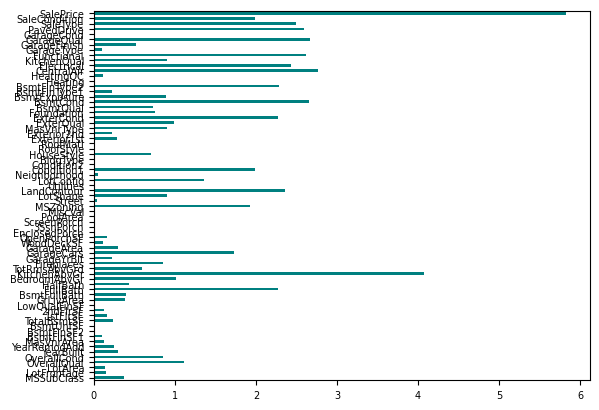

In [22]:
#Mutual Info Classification of train data

imp = mutual_info_classif(fin_train,fin_train['SalePrice'])
feat_imp = pd.Series(imp, fin_train.columns[0:len(fin_train)-1])
feat_imp.plot(kind = 'barh', color = 'teal')
plt.show()

In [23]:
#Removing Non important features from train data

imp = []
feat_imp = dict(feat_imp)
fin_train_copy = fin_train.copy()
for i in feat_imp:
  if feat_imp[i]>=0.2:
    imp.append(i)
  else:
    del fin_train_copy[i]
print(imp)
print(len(imp))

['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Condition1', 'HouseStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition', 'SalePrice']
44


In [39]:
#Scaling
df_imputed_X = fin_train_copy.copy()
y = df_imputed_X['SalePrice']
del df_imputed_X['SalePrice']
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(df_imputed_X)

# **Model Construction and Testing**

In [25]:
#Train-Validation Split, Model Construction and Prediction

X_train, X_val, y_train, y_val = train_test_split(X, y)
KNR = KNeighborsRegressor(n_neighbors=19,weights='distance')
KNR.fit(X_train,y_train)
y_pred_val = KNR.predict(X_val)

In [26]:
#Evaluation of Validation Data
mse = mean_squared_error(np.log(y_val), np.log(y_pred_val))
print(f'Root Mean Squared Error: {mse**0.5}')

Root Mean Squared Error: 0.19838051208068913


In [27]:
#Filtering of Features in Test Dataset and Test Data Scaling
imp.remove("SalePrice")
test_copy = fin_test[imp]
min_max_scaler = MinMaxScaler()
X_test = min_max_scaler.fit_transform(test_copy)

In [28]:
#TESTING and Saving the Submission File
y_pred_test = KNR.predict(X_test)

with open('Submission.csv', 'w', newline = '') as f:
  writer = csv.writer(f)
  writer.writerow(['Id', 'SalePrice'])
  k = 1461
  for i in y_pred_test:
    writer.writerow([k, i])
    k+=1

# **Insights Via Clustering**

In [29]:
df_imputed_X['SalePrice'] = y

In [30]:
!pip install kneed

done MSSubClass
done OverallQual
done OverallCond
done YearBuilt
done YearRemodAdd
done TotalBsmtSF
done GrLivArea
done BsmtFullBath
done FullBath
done HalfBath
done BedroomAbvGr
done KitchenAbvGr
done TotRmsAbvGrd
done Fireplaces
done GarageYrBlt
done GarageCars
done GarageArea
done MSZoning
done LotShape
done LandContour
done LotConfig
done Condition1
done HouseStyle
done Exterior1st
done Exterior2nd
done MasVnrType
done ExterQual
done ExterCond
done Foundation
done BsmtQual
done BsmtCond
done BsmtExposure
done BsmtFinType1
done BsmtFinType2
done CentralAir
done Electrical
done KitchenQual
done Functional
done GarageFinish
done GarageQual
done PavedDrive
done SaleType
done SaleCondition


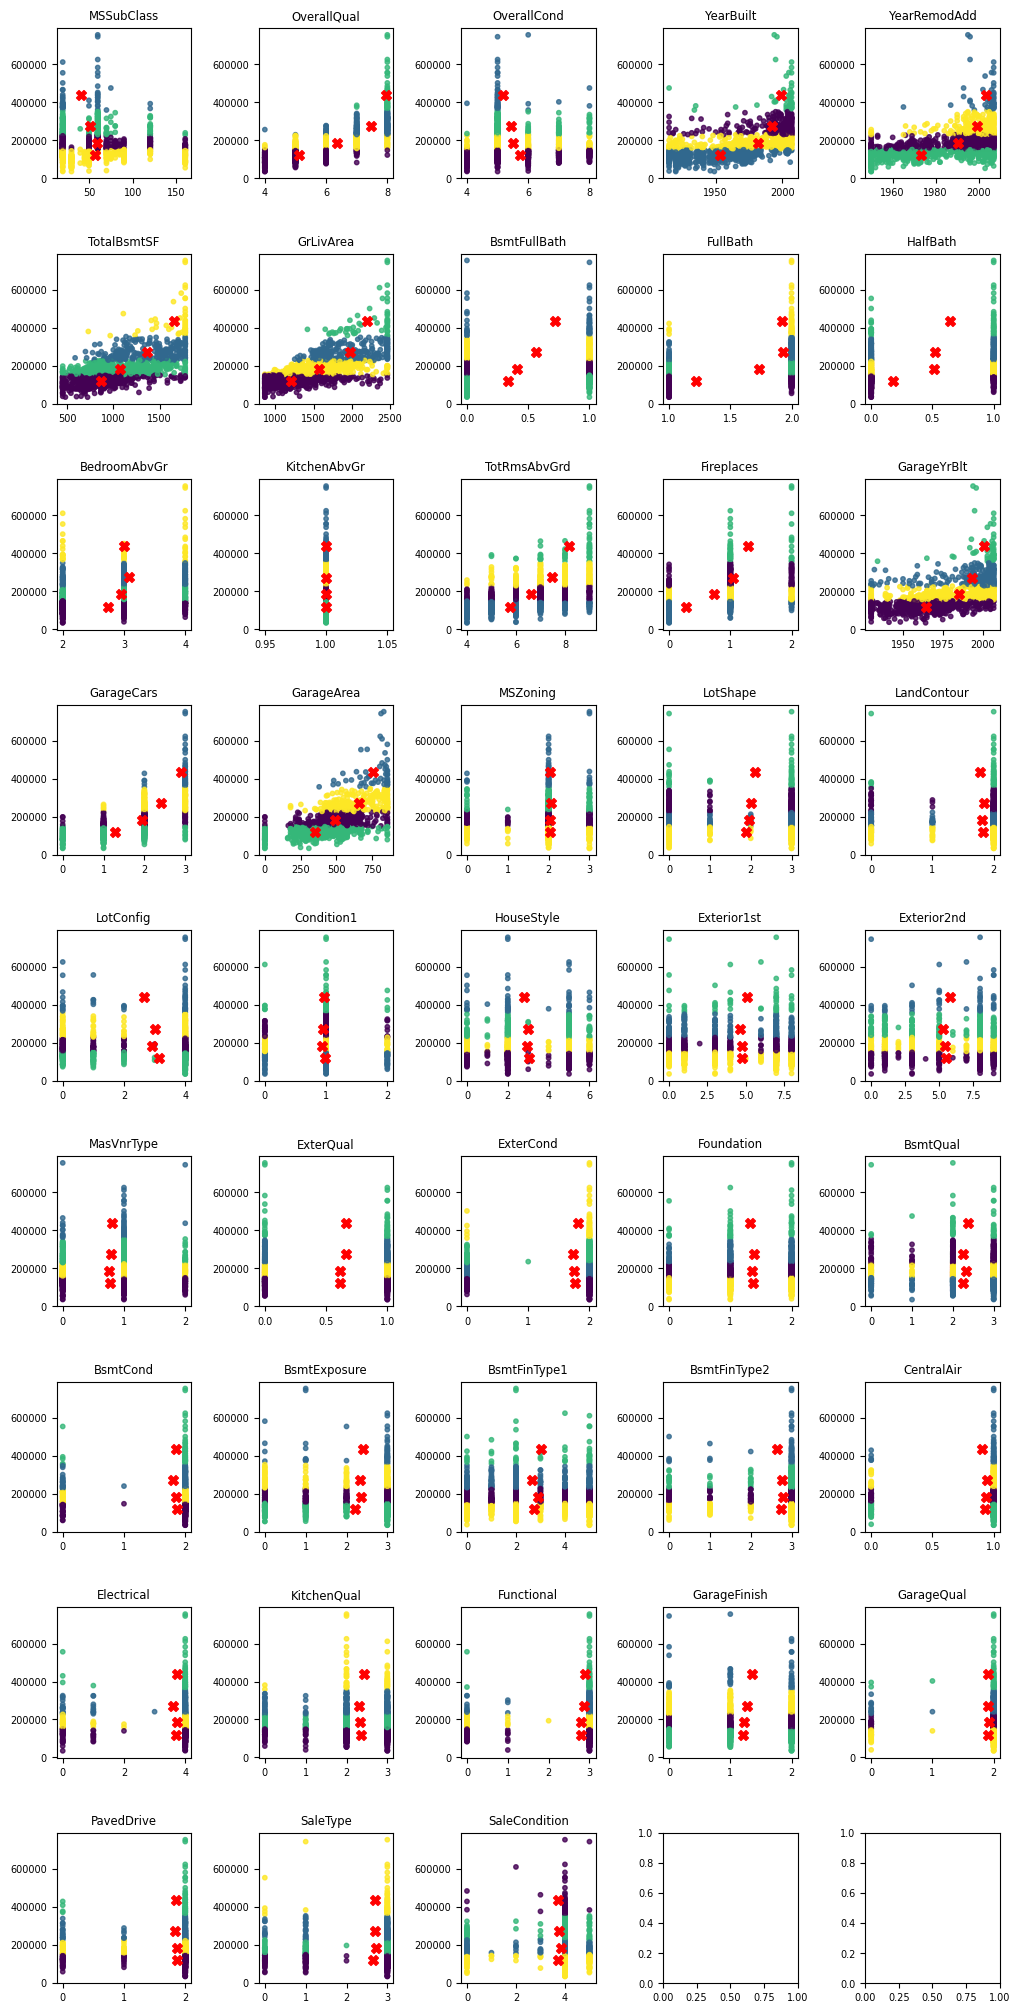

In [31]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

figure, axis = plt.subplots(9, 5,figsize=(10,20))
figure.tight_layout()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

i_1 = 0
j_1 = 0

for i in df_imputed_X.columns[:-1]:
  X = df_imputed_X.loc[:,[i,'SalePrice']]
  x = X.copy()
  wcss_list= []
  max_clusters = 20
  for j in range(1, max_clusters):
    kmeans = KMeans(n_clusters=j, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
  kneedle = KneeLocator(range(1, max_clusters), wcss_list, curve="convex", direction="decreasing")
  elbow_point = kneedle.elbow
  Kmean_new = KMeans(n_clusters=elbow_point)
  Kmean_new.fit(x)
  centers = Kmean_new.cluster_centers_
  labels = Kmean_new.labels_

  axis[i_1, j_1].scatter(x.loc[:, i], x.loc[:, "SalePrice"], c=labels, cmap='viridis', s=10, alpha=0.8)
  axis[i_1, j_1].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=50, label='Centers')

  axis[i_1, j_1].set_title(i)
  j_1 +=1
  i_1 += j_1//5
  j_1%=5
  print(f"done {i}")

plt.show()


Post multiple iterations of varying hypeparameters and configurations also, no meaningful clusters were observed, hence no insights were drawn from KMeans Clustering

# **Building an interface using Gradio**

In [31]:
#!pip install openai
#!pip install tiktoken
#!pip install kaleido
#!pip install cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.0 MB/s eta 

In [32]:
#!pip install typing-extensions==4.6.0

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
openai 1.9.0 requires typing-extensions<5,>=4.7, but you have typing-extensions 4.6.0 which is incompatible.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.6.0 which is incompatible.


In [36]:
#!pip install jiwer
#!pip install gradio typing-extensions

In [38]:
#!pip uninstall cast_control
#!pip install cast_control==0.10.11

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.4/97.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.7/241.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.1/347.1 kB 31.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.4 MB/s eta 0:00:00
  Created wheel for daemons: filename=daemons-1.3.2-py3-none-any.whl size=21241 sha256=6d84b410465def7cc7571198b839becf737aa00c41c98dd91ff3868aebd03817
  Stored in directory: /root/.cache/pip/wheels/21/4d/e2/d7e

In [39]:
#!pip install typing-extensions --upgrade

# **NOTE: RESTART RUNTIME AFTER GRADIO INSTALLATION**

In [51]:
import gradio as gr


def greet(MSSubClass, OverallQual,OverallCond, YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, MSZoning, LotShape, LandContour, LotConfig, Condition1, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, CentralAir, Electrical, KitchenQual, Functional, GarageFinish, GarageQual, PavedDrive, SaleType, SaleCondition):
  #Scaling

  min_max_scaler = MinMaxScaler()
  df_imputed_X.loc[len(df_imputed_X.index)] = [MSSubClass, OverallQual,OverallCond, YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, BsmtFullBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, MSZoning, LotShape, LandContour, LotConfig, Condition1, HouseStyle, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, CentralAir, Electrical, KitchenQual, Functional, GarageFinish, GarageQual, PavedDrive, SaleType, SaleCondition]
  for i in df_imputed_X.columns:
    if i in encodings:
      df_imputed_X.loc[len(df_imputed_X.index),i] = encodings[i].keys()[encodings[i].values().index(df_imputed_X.loc[len(df_imputed_X.index),i])]
  X = min_max_scaler.fit_transform(df_imputed_X)
  x = X[-1]
  return KNR.predict([[x]])

demo = gr.Interface(
    fn=greet,
    inputs=[gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
            gr.Number(),
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text',
 'text'],
    outputs=[gr.Number()],
)

demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c37e564aa8430aeb1d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
